In [4]:
from jqdatasdk import *
auth("13586937048", "HamalHCHbest555")

auth success 


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import datetime
import warnings
from tqdm import tqdm
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import spearmanr
from HCH_singlefactor_analysis import SingleFactorTool
import pickle
%matplotlib inline

In [5]:
count=get_query_count()
print(count)

{'total': 1000000, 'spare': 894018}


In [4]:
df = get_all_securities(['etf'])
df = df.reset_index().rename(columns={'index':'code'})
df = df[df['start_date'] < '2023-01-01']
df

,code,display_name,name,start_date,end_date,type
0,159001.XSHE,货币ETF,BZJ,2014-10-20,2200-01-01,etf
1,159003.XSHE,招商快线ETF,ZSKX,2014-10-20,2200-01-01,etf
2,159005.XSHE,汇添富快钱ETF,TFKQ,2015-01-13,2200-01-01,etf
288,159601.XSHE,A50ETF,A50ETF,2021-11-08,2200-01-01,etf
289,159602.XSHE,中国A50ETF,ZGA50ETF,2021-11-08,2200-01-01,etf
...,...,...,...,...,...,...
1395,588360.XSHG,创创ETF,CCETF,2021-07-06,2200-01-01,etf
1396,588370.XSHG,科创策略,KCCL,2022-12-13,2200-01-01,etf
1397,588380.XSHG,创50ETF,C50ETF,2021-07-06,2200-01-01,etf
1398,588390.XSHG,科创创业,KCCY,2021-08-30,2200-01-01,etf


In [5]:
codes = []
for code in df.code:
    price = get_price(code, end_date='2025-09-13', count=300).dropna()
    price['pchg'] = price['close'].pct_change()
    if price['money'].mean() > 5e7: # 日均低于5000w成交额
        codes.append([code, price['money'].mean()/1e8, price['pchg'].mean(), price['pchg'].std()])
    else:
        print(f"排除{code} {df[df['code']==code]['display_name'].iloc[0]}, 成交额均值 {round(price['money'].mean()/1e7, 2)}kw")
codes = pd.DataFrame(codes, columns=['code', 'money','pchg_mean','pchg_std'])
df = df.merge(codes, how='inner', on='code')
df.to_excel('多因子研究环境-ETF.xlsx', index=False)

排除159003.XSHE 招商快线ETF, 成交额均值 2.43kw
排除159005.XSHE 汇添富快钱ETF, 成交额均值 1.2kw
排除159602.XSHE 中国A50ETF, 成交额均值 1.54kw
排除159603.XSHE 双创龙头ETF, 成交额均值 1.47kw
排除159606.XSHE 中证500成长ETF, 成交额均值 0.97kw
排除159608.XSHE 稀有金属ETF, 成交额均值 2.07kw
排除159609.XSHE 光伏龙头ETF, 成交额均值 1.82kw
排除159610.XSHE 500ETF增强, 成交额均值 1.86kw
排除159613.XSHE 信息安全ETF, 成交额均值 0.54kw
排除159616.XSHE 农牧ETF, 成交额均值 0.48kw
排除159617.XSHE 500价值ETF, 成交额均值 0.17kw
排除159618.XSHE 光伏ETF指数基金, 成交额均值 0.43kw
排除159619.XSHE 基建ETF, 成交额均值 1.77kw
排除159620.XSHE 500成长ETF, 成交额均值 0.19kw
排除159621.XSHE MSCIESGETF, 成交额均值 0.26kw
排除159623.XSHE 成渝经济圈ETF, 成交额均值 0.6kw
排除159625.XSHE 绿色电力ETF, 成交额均值 1.6kw
排除159627.XSHE A100ETF, 成交额均值 0.36kw
排除159630.XSHE A100ETF基金, 成交额均值 0.29kw
排除159631.XSHE 中证A100ETF, 成交额均值 0.8kw
排除159635.XSHE 基建50ETF, 成交额均值 1.57kw
排除159637.XSHE 新能源车ETF东财, 成交额均值 1.26kw
排除159639.XSHE 碳中和ETF南方, 成交额均值 1.02kw
排除159640.XSHE 碳中和龙头ETF, 成交额均值 0.43kw
排除159641.XSHE 双碳ETF, 成交额均值 1.27kw
排除159642.XSHE 碳中和100ETF, 成交额均值 0.07kw
排除159643.XSHE 疫苗ETF, 成交额均值 0.95kw
排除159645.XSHE 疫苗

单因子测试
============================
导入相关包

In [4]:
# 获取行情与因子数据
stocks = list(get_all_securities(['stock']).index)
security_list = stocks[:100]

In [5]:
d = get_industry(security=security_list,date="2025-09-01",df=True)
industry_data = d[d.type == 'zjw']
industry_data

,code,type,industry_code,industry_name
1,000056.XSHE,zjw,L72,商务服务业
2,000058.XSHE,zjw,L72,商务服务业
3,000061.XSHE,zjw,L72,商务服务业
5,000415.XSHE,zjw,L71,租赁业
14,000089.XSHE,zjw,G56,航空运输业
...,...,...,...,...
431,000156.XSHE,zjw,I63,电信、广播电视和卫星传输服务
463,000009.XSHE,zjw,J69,其他金融业
466,000166.XSHE,zjw,J67,资本市场服务
467,000001.XSHE,zjw,J66,货币金融服务


In [6]:
sample_data = get_factor_values(securities=security_list, factors=['sharpe_ratio_120'], 
                             end_date='2025-09-1',count=200)
price_data = get_price(security=security_list, end_date='2025-09-1', frequency='daily', fields=['close'], skip_paused=False, fq='pre', count=200 , round=True)
#将sample_data转换成dataframe
factor_data = sample_data['sharpe_ratio_120'].copy()
factor_data.index = pd.to_datetime(factor_data.index)
factor_data = factor_data.sort_index()



In [7]:
price_data.rename(columns={'code':'order_book_id','time':'date'}, inplace=True)
price_data

,date,order_book_id,close
0,2024-11-08,000001.XSHE,11.13
1,2024-11-11,000001.XSHE,11.01
2,2024-11-12,000001.XSHE,10.96
3,2024-11-13,000001.XSHE,11.02
4,2024-11-14,000001.XSHE,10.96
...,...,...,...
19995,2025-08-26,000428.XSHE,3.70
19996,2025-08-27,000428.XSHE,3.61
19997,2025-08-28,000428.XSHE,3.65
19998,2025-08-29,000428.XSHE,3.66


In [8]:
industry_data.rename(columns={'code':'order_book_id'}, inplace=True)
industry_data

,order_book_id,type,industry_code,industry_name
1,000056.XSHE,zjw,L72,商务服务业
2,000058.XSHE,zjw,L72,商务服务业
3,000061.XSHE,zjw,L72,商务服务业
5,000415.XSHE,zjw,L71,租赁业
14,000089.XSHE,zjw,G56,航空运输业
...,...,...,...,...
431,000156.XSHE,zjw,I63,电信、广播电视和卫星传输服务
463,000009.XSHE,zjw,J69,其他金融业
466,000166.XSHE,zjw,J67,资本市场服务
467,000001.XSHE,zjw,J66,货币金融服务


In [9]:
price_industry = price_data.merge(industry_data[['order_book_id', 'industry_name']], on='order_book_id', how='left')
price_industry

,date,order_book_id,close,industry_name
0,2024-11-08,000001.XSHE,11.13,货币金融服务
1,2024-11-11,000001.XSHE,11.01,货币金融服务
2,2024-11-12,000001.XSHE,10.96,货币金融服务
3,2024-11-13,000001.XSHE,11.02,货币金融服务
4,2024-11-14,000001.XSHE,10.96,货币金融服务
...,...,...,...,...
19995,2025-08-26,000428.XSHE,3.70,住宿业
19996,2025-08-27,000428.XSHE,3.61,住宿业
19997,2025-08-28,000428.XSHE,3.65,住宿业
19998,2025-08-29,000428.XSHE,3.66,住宿业


In [10]:
# 数据预处理
price_data.columns=['date','order_book_id','close']
price_data.sort_values(by=['date','order_book_id'], inplace=True)
factor_data.reset_index(inplace=True)
factor_data.rename(columns={'index':'date'}, inplace=True)

In [11]:
price_data

,date,order_book_id,close
0,2024-11-08,000001.XSHE,11.13
200,2024-11-08,000002.XSHE,9.51
400,2024-11-08,000004.XSHE,19.32
600,2024-11-08,000005.XSHE,NaN
800,2024-11-08,000006.XSHE,8.97
...,...,...,...
19199,2025-09-01,000422.XSHE,14.28
19399,2025-09-01,000423.XSHE,50.55
19599,2025-09-01,000425.XSHE,9.89
19799,2025-09-01,000426.XSHE,23.09


In [12]:
factor_data

,date,000001.XSHE,000002.XSHE,000004.XSHE,000005.XSHE,000006.XSHE,000007.XSHE,000008.XSHE,000009.XSHE,000010.XSHE,...,000417.XSHE,000418.XSHE,000419.XSHE,000420.XSHE,000421.XSHE,000422.XSHE,000423.XSHE,000425.XSHE,000426.XSHE,000428.XSHE
0,2024-11-08,1.278418,1.161028,2.381302,NaN,6.818917,4.609627,1.039559,-0.029679,2.749074,...,0.729763,NaN,1.134021,0.653715,0.230463,0.899119,-0.689866,0.296961,0.059686,0.889249
1,2024-11-11,1.247321,0.808943,2.630496,NaN,7.602487,4.637971,1.311228,0.162456,2.440215,...,0.807825,NaN,1.107206,0.249071,0.515166,0.676830,-0.802466,0.409253,0.097767,0.776497
2,2024-11-12,0.901431,0.446183,2.613307,NaN,8.107203,4.683804,1.079985,0.092788,2.039848,...,0.902596,NaN,0.904156,0.080446,0.466301,0.803728,-0.650023,0.183379,-0.166989,0.762034
3,2024-11-13,0.753721,-0.046906,2.511209,NaN,6.166505,4.086611,0.876661,-0.061413,1.806894,...,0.789202,NaN,0.919139,-0.455539,0.336050,0.388178,-0.675506,0.241816,-0.268233,0.376311
4,2024-11-14,0.729835,-0.180987,1.872375,NaN,5.073939,3.639295,0.665813,-0.189372,1.803572,...,0.673248,NaN,0.676752,-0.677131,0.328407,0.385884,-0.662202,0.288312,-0.689401,0.123426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2025-08-26,1.082183,-0.801267,-0.580244,NaN,0.503046,1.063082,0.262029,0.638929,3.514999,...,0.680851,NaN,0.545730,0.538437,0.813370,0.795479,-0.860168,0.325839,4.428330,1.145039
196,2025-08-27,0.562898,-0.928613,-0.378321,NaN,0.301202,0.917862,0.012883,0.636541,3.183755,...,0.530930,NaN,0.415937,0.546499,0.549668,0.671090,-0.809511,-0.004327,3.347046,1.021121
197,2025-08-28,0.617947,-1.109439,-0.348316,NaN,0.328089,0.904624,0.012459,0.591722,3.102343,...,0.563601,NaN,0.387158,0.510027,0.448783,0.695650,-0.807391,0.271214,3.418312,1.083152
198,2025-08-29,0.541326,-0.908740,-0.387612,NaN,0.621380,0.996337,0.075907,1.075816,2.632324,...,0.645840,NaN,0.443890,0.564566,0.411180,0.688310,-0.734301,0.055113,3.616990,1.185621


In [13]:
# 因子数据整理为长格式
factor_date_reset = None
factor_date_reset = factor_data.melt(id_vars=['date'], var_name='order_book_id', value_name='sharpe_ratio_120')
factor_date_reset.sort_values(by=['date','order_book_id'], inplace=True)
factor_date_reset.rename(columns={'sharpe_ratio_120':'factor_value'}, inplace=True)
factor_date_reset


,date,order_book_id,factor_value
0,2024-11-08,000001.XSHE,1.278418
200,2024-11-08,000002.XSHE,1.161028
400,2024-11-08,000004.XSHE,2.381302
600,2024-11-08,000005.XSHE,NaN
800,2024-11-08,000006.XSHE,6.818917
...,...,...,...
19199,2025-09-01,000422.XSHE,0.859262
19399,2025-09-01,000423.XSHE,-0.763356
19599,2025-09-01,000425.XSHE,0.269480
19799,2025-09-01,000426.XSHE,5.167494


In [19]:
def calculate_factor_ic(factor_df, price_df, forward_days=5, buy_filter=True, sell_filter=False):
    merged_df = pd.merge(factor_df, price_df, on=['date', 'order_book_id'], how='inner')
    merged_df['future_return'] = merged_df.groupby('order_book_id')['close'].shift(-forward_days) / merged_df['close'] - 1
    ic_values = []


In [14]:
merged_df = pd.merge(factor_date_reset, price_industry, on=['date', 'order_book_id'], how='inner')
merged_df['future_return'] = merged_df.groupby('order_book_id')['close'].shift(-1) / merged_df['close'] - 1
merged_df.dropna(inplace=True)
merged_df

,date,order_book_id,factor_value,close,industry_name,future_return
0,2024-11-08,000001.XSHE,1.278418,11.13,货币金融服务,-0.010782
1,2024-11-08,000002.XSHE,1.161028,9.51,房地产业,-0.022082
2,2024-11-08,000004.XSHE,2.381302,19.32,软件和信息技术服务业,0.055901
4,2024-11-08,000006.XSHE,6.818917,8.97,房地产业,0.056856
5,2024-11-08,000007.XSHE,4.609627,7.46,房地产业,0.021448
...,...,...,...,...,...,...
19895,2025-08-29,000422.XSHE,0.688310,13.99,化学原料和化学制品制造业,0.020729
19896,2025-08-29,000423.XSHE,-0.734301,50.60,医药制造业,-0.000988
19897,2025-08-29,000425.XSHE,0.055113,9.56,专用设备制造业,0.034519
19898,2025-08-29,000426.XSHE,3.616990,21.33,有色金属矿采选业,0.082513


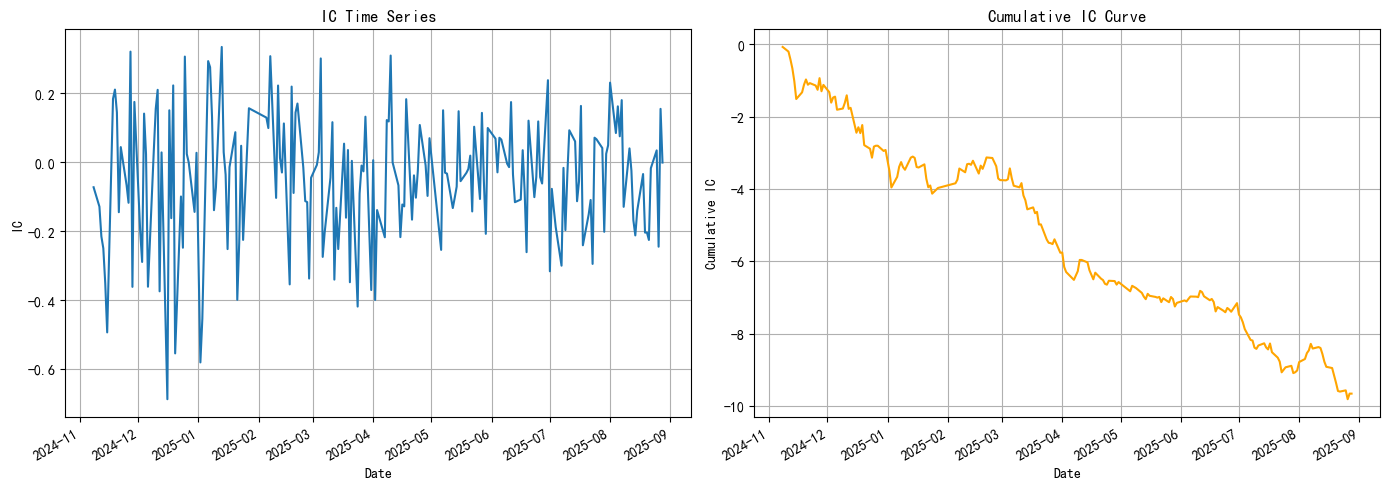

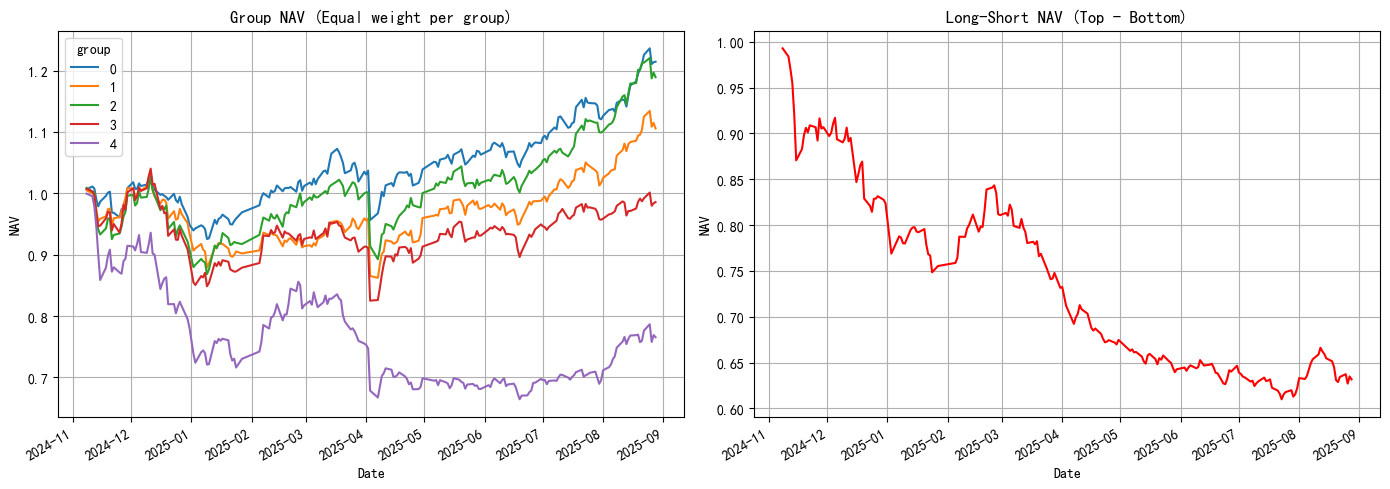

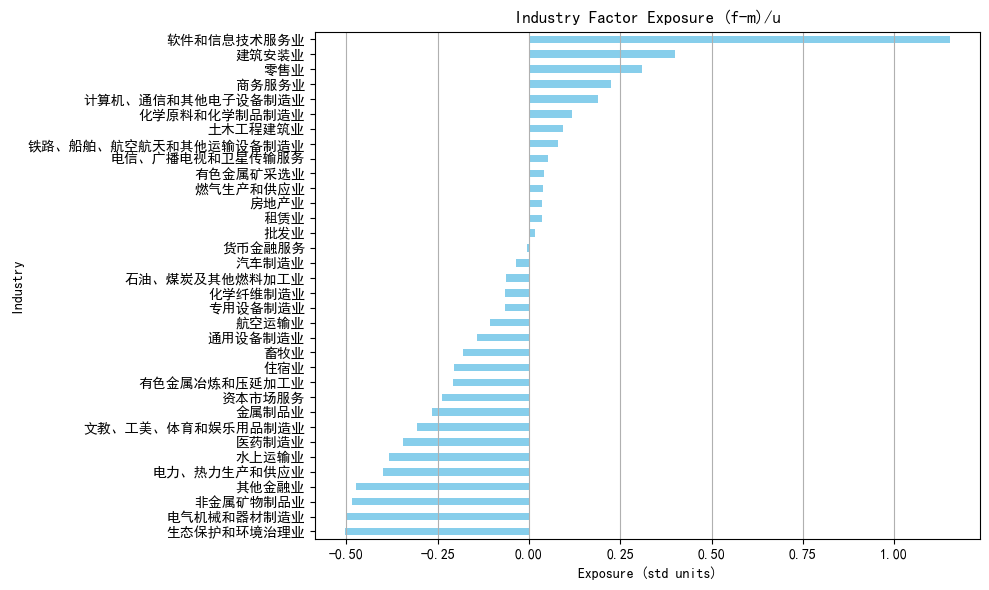

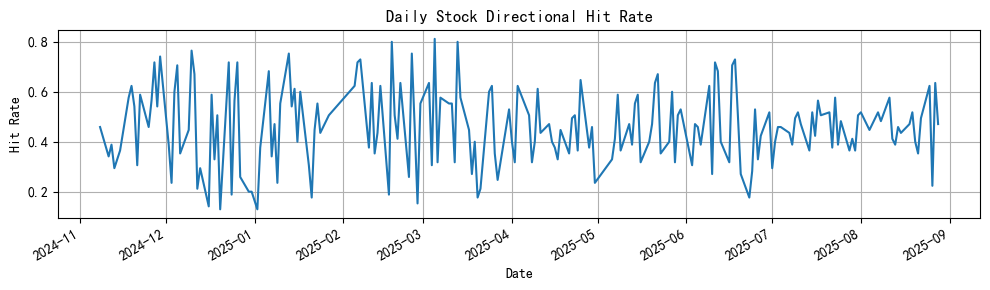

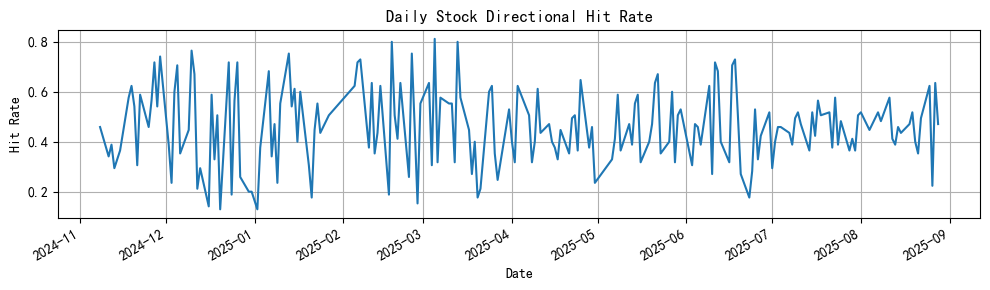

In [15]:
# 假设你已有 merged_df（包含 date, order_book_id, factor_value, close）
sft = SingleFactorTool(factor_long_df=merged_df[['date','order_book_id','factor_value']],
                       price_df=merged_df[['date','order_book_id','close','industry_name']])
sft.generate_future_return(forward_days=1)

ic_df, ic_stats = sft.calculate_ic_cross_sectional()
sft.plot_ic(ic_df)

res = sft.layered_effect_analysis(n_groups=5)
exposure = sft.industry_exposure()
sft.plot_industry_exposure(exposure)

hit = sft.factor_hit_rates()

多因子集中测试
======================

In [11]:
count=get_query_count()
print(count)

{'total': 1000000, 'spare': 934018}


In [4]:
# 获取行情与因子数据
stocks = list(get_all_securities(['stock']).index)
security_list = stocks[:100]

In [5]:
d = get_industry(security=security_list,date="2025-09-01",df=True)
industry_data = d[d.type == 'zjw']
industry_data

,code,type,industry_code,industry_name
1,000056.XSHE,zjw,L72,商务服务业
2,000058.XSHE,zjw,L72,商务服务业
3,000061.XSHE,zjw,L72,商务服务业
5,000415.XSHE,zjw,L71,租赁业
14,000089.XSHE,zjw,G56,航空运输业
...,...,...,...,...
431,000156.XSHE,zjw,I63,电信、广播电视和卫星传输服务
463,000009.XSHE,zjw,J69,其他金融业
466,000166.XSHE,zjw,J67,资本市场服务
467,000001.XSHE,zjw,J66,货币金融服务


In [48]:
sample_data = get_factor_values(securities=security_list, factors=['sharpe_ratio_120','Variance20','arron_up_25'],
                             end_date='2025-09-1',count=200)
price_data = get_price(security=security_list, end_date='2025-09-1', frequency='daily', fields=['close'], skip_paused=False, fq='pre', count=200 , round=True)

In [49]:
price_data.rename(columns={'time':'date', 'code':'order_book_id'}, inplace=True)
price_data

,date,order_book_id,close
0,2024-11-08,000001.XSHE,11.13
1,2024-11-11,000001.XSHE,11.01
2,2024-11-12,000001.XSHE,10.96
3,2024-11-13,000001.XSHE,11.02
4,2024-11-14,000001.XSHE,10.96
...,...,...,...
19995,2025-08-26,000428.XSHE,3.70
19996,2025-08-27,000428.XSHE,3.61
19997,2025-08-28,000428.XSHE,3.65
19998,2025-08-29,000428.XSHE,3.66


In [ ]:
#缓存数据

with open('factor_data.pkl', 'wb') as f:
    pickle.dump(sample_data, f)
    pickle.dump(price_data, f)

In [6]:
#读取缓存数据

with open('factor_data.pkl', 'rb') as f:
    sample_data = pickle.load(f)
    price_data = pickle.load(f)

In [7]:
#数据处理
def multi_data_processing(sample_data: dict[str, pd.DataFrame]):
    factor_data_reset = sample_data.copy()
    factor_data = price_data.copy()
    for keys in factor_data_reset.keys():
        factor_data_reset[keys] = factor_data_reset[keys].reset_index().rename(columns={'index':'date'}).melt(id_vars=['date'], var_name='order_book_id', value_name=keys).set_index('date')
        factor_data = pd.merge(factor_data,factor_data_reset[keys], on=['date','order_book_id'], how='inner')
    return factor_data
# 使用示例
factor_data = multi_data_processing(sample_data)

In [8]:
factor_long_df = pd.melt(
    factor_data,
    id_vars=['date', 'order_book_id'],
    value_vars=[col for col in factor_data.columns if col not in ['date','order_book_id','close','future_return']],
    var_name='factor_name',
    value_name='factor_value'
)

In [9]:
factor_long_df

,date,order_book_id,factor_name,factor_value
0,2024-11-08,000001.XSHE,sharpe_ratio_120,1.278418
1,2024-11-11,000001.XSHE,sharpe_ratio_120,1.247321
2,2024-11-12,000001.XSHE,sharpe_ratio_120,0.901431
3,2024-11-13,000001.XSHE,sharpe_ratio_120,0.753721
4,2024-11-14,000001.XSHE,sharpe_ratio_120,0.729835
...,...,...,...,...
59995,2025-08-26,000428.XSHE,Variance20,0.037792
59996,2025-08-27,000428.XSHE,Variance20,0.045416
59997,2025-08-28,000428.XSHE,Variance20,0.036817
59998,2025-08-29,000428.XSHE,Variance20,0.036794


In [10]:

ic_result = {}
ic_df = {}
for fname in factor_long_df['factor_name'].unique():
    df = factor_long_df[factor_long_df['factor_name'] == fname]
    sft = SingleFactorTool(
        factor_long_df=df[['date','order_book_id','factor_value']],
        price_df=factor_data[['date','order_book_id','close']]
    )
    sft.generate_future_return(forward_days=1)
    ic_df[fname], ic_stats = sft.calculate_ic_cross_sectional()
    ic_result[fname] = ic_stats
    print(f"{fname} IC均值: {ic_stats['IC_mean']:.4f}, ICIR: {ic_stats['ICIR']:.4f}")

sharpe_ratio_120 IC均值: -0.0418, ICIR: -0.2259
arron_up_25 IC均值: -0.0401, ICIR: -0.2589
Variance20 IC均值: -0.0719, ICIR: -0.3035


In [11]:
def calculate_all_factors_ic(factor_data:pd.DataFrame):
    factor_long_df = pd.melt(
    factor_data,
    id_vars=['date', 'order_book_id'],
    value_vars=[col for col in factor_data.columns if col not in ['date','order_book_id','close','future_return']],
    var_name='factor_name',
    value_name='factor_value')
    ic_result = {}
    ic_df = {}
    for fname in factor_long_df['factor_name'].unique():
        df = factor_long_df[factor_long_df['factor_name'] == fname]
        sft = SingleFactorTool(
            factor_long_df=df[['date','order_book_id','factor_value']],
            price_df=factor_data[['date','order_book_id','close']]
        )
        sft.generate_future_return(forward_days=1)
        ic_df[fname], ic_stats = sft.calculate_ic_cross_sectional()
        ic_result[fname] = ic_stats
    return ic_df , ic_result
#运用函数
ic_df , ic_result = calculate_all_factors_ic(factor_data)
print(ic_df)
print(ic_result)

{'sharpe_ratio_120':           date        ic
0   2024-11-08 -0.043287
1   2024-11-11 -0.094693
2   2024-11-12 -0.200048
3   2024-11-13 -0.274003
4   2024-11-14 -0.318213
..         ...       ...
194 2025-08-25  0.034496
195 2025-08-26 -0.245301
196 2025-08-27  0.155262
197 2025-08-28 -0.000782
198 2025-08-29  0.218136

[199 rows x 2 columns], 'arron_up_25':           date        ic
0   2024-11-08 -0.014038
1   2024-11-11 -0.177627
2   2024-11-12 -0.257683
3   2024-11-13 -0.190980
4   2024-11-14  0.148966
..         ...       ...
194 2025-08-25  0.036842
195 2025-08-26  0.120467
196 2025-08-27  0.254976
197 2025-08-28  0.005250
198 2025-08-29  0.000207

[199 rows x 2 columns], 'Variance20':           date        ic
0   2024-11-08  0.065884
1   2024-11-11 -0.113524
2   2024-11-12 -0.263636
3   2024-11-13 -0.355385
4   2024-11-14 -0.557243
..         ...       ...
194 2025-08-25  0.129327
195 2025-08-26 -0.459432
196 2025-08-27  0.260842
197 2025-08-28 -0.316642
198 2025-08-29  0.199609


sharpe_ratio_120
arron_up_25
Variance20


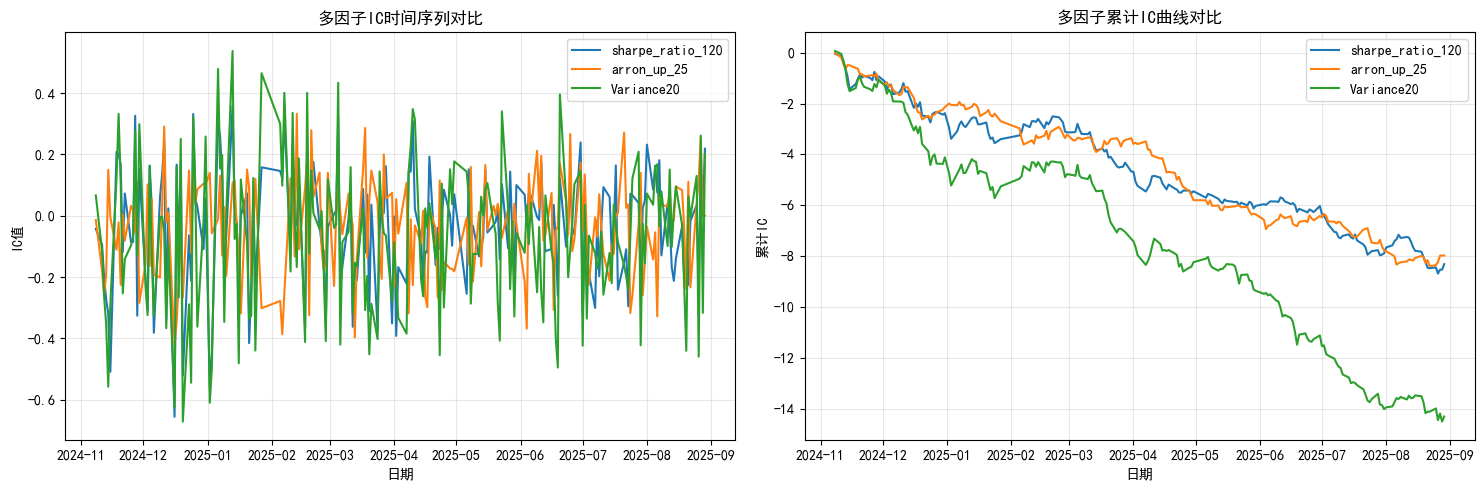

In [ ]:
def plot_multifactor_ic(ic_df:dict):
    df = None
    for keys in ic_df.keys():
        print(keys)
        if df is None:
            df = ic_df[keys].rename(columns={'ic':'ic_'+keys})
        else:
            df = pd.merge(df, ic_df[keys].rename(columns={'ic':'ic_'+keys}), on='date', how='inner')
    # 绘制多因子IC累计曲线对比
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # 左图：IC时间序列
    for col in df.columns:
        if col.startswith('ic_'):
            factor_name = col.replace('ic_', '')
            ax1.plot(df['date'], df[col], label=factor_name, linewidth=1.5)
    ax1.set_title('多因子IC时间序列对比', fontsize=12, fontweight='bold')
    ax1.set_xlabel('日期')
    ax1.set_ylabel('IC值')
    ax1.legend(loc='best')
    ax1.grid(True, alpha=0.3)

    # 右图：IC累计曲线
    for col in df.columns:
        if col.startswith('ic_'):
            factor_name = col.replace('ic_', '')
            cumulative_ic = df[col].cumsum()
            ax2.plot(df['date'], cumulative_ic, label=factor_name, linewidth=1.5)
    ax2.set_title('多因子累计IC曲线对比', fontsize=12, fontweight='bold')
    ax2.set_xlabel('日期')
    ax2.set_ylabel('累计IC')
    ax2.legend(loc='best') 
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()
    return
#应用示例
plot_multifactor_ic(ic_df)


<Axes: >